# Unsupervised learning

This lecture covers the following topics
1. Dimensionality reduction
  1. Principal Component Analysis (**PCA**): PCA is important and fundamental. It will be covered and needs to be understood very well.
  1. *Independent Component Analysis (**ICA**)*: Will be just shortly mentioned for curiosity
  1. Manifold learning, Multi-Dimensional Scaling (**MDS**) and Locally Linear Embedding (LLE):* will be introduced shortly, but not studied in detail.
  1. t-distributed Stochastic Neighbor Embedding (**t-SNE**), introduced, but we do not go into details
1. Clustering
  1. **k-Means** and explanation of Expectation Maximization (**E-M**) algorithm.
  1. Gaussian mixture model, **GMM**
  1. Overview of other methods


Read more details from the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html) by Jake VanderPlas published under Creative Commons [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode).

![Python Data Science Handbook](kuvat/PDSH-cover-small.png)

## Clustering

A Cluster
>A group of the same or similar elements gathered or occurring closely together.

To consider the concept of similarity, we need to define a metric, which measures the similarity between objects. Assume that there are apples and oranges on the table. Human observer usually thinks that oranges are more similar with each other than with oranges and vice versa. What is the metrics that a human uses for making this decision? It could be for example the colour, surface texture and shape. 

To implement a machine learning algorith performing the same task, one could measure the hue of the color (H), and the parameter describing surface roughness (S) and then plot each apple and orange in the orthogonal 2D H-S coordinates. The similarity between objects can be for example the euqlidean distance $D_e=\sqrt{\Delta H^2 + \Delta S^2}$, between objects in this 2D space. Then probably the distance inside group of oranges and group of apples would be smaller than the distances between apples and oranges. Therefore apples could form a dense group and oranges another dense group, and the distance between the groups could be larger.

![ApplesandOranges](kuvat/ApplesAndOranges.png)

The purpose of the clustering is to recognizes a dense group of points surrounded by more sparsely populated areas. The clustering algorith clusters the data in the design matrix $X=[H^T, S^T]$ into cluster memberships, $c_i$.


$$
   \begin{bmatrix}
   c_1 \\
   c_2 \\
   \vdots \\
   c_n
   \end{bmatrix}
   = f 
   \left( \begin{bmatrix}
     x_{11} & x_{12} & x_{13} & \dots  & x_{1p} \\
     x_{21} & x_{22} & x_{23} & \dots  & x_{2p} \\
     \vdots & \vdots & \vdots & \ddots & \vdots \\
     x_{n1} & x_{n2} & x_{n3} & \dots  & x_{np}
   \end{bmatrix} \right)
$$

- The clustering does not need any training data, so it is an unsupervised method. 
- The result of clustering is just clusters and their memberships, the algorithm does not name the clusters nor understand what are the objects in certain cluster.
- Many clustering methods needs the number of clusters to be given *a priori*.

## k-Means

k-Means is a simple clustering algorithms based on arithmetic distances and Expectation-Maximization (E-M) algorithm. It is simple and usefull in many cases.

The K-means algorithm aims to choose cluster centers (centroids) that minimise the inertia, or within-cluster sum-of-squares criterion presented by the following objective function, $J$:

$$
   J =\sum_{j=1}^{k} \sum_{i=1}^{n} || x_i - c_j ||,
$$

where, $x_i$ is a sample (case) and $c_j$ is the centroid of the cluster, $n$ is the number of samples and $k$ is the number of clusters. $|| x_i - c_j ||$ is the arithmetic distance from a sample to the nearest centroid $c_j$. The sample $x_i$ is said to belong to cluster $j$ iff $c_j$ is the nearest cluster center.


Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:
- It is assumed that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.
- Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.
- k-Means uses euqlidean distance, and it is therefore necessary to normalize the input variables before clustering
- The correlation between variables is a problem, and therefore it is good to decorrelate the variables first, for example using PCA


### Example case

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

ModuleNotFoundError: No module named 'matplotlib'

#### Create 2D sample data using sample data generator

Import `make_blobs` from `datasets` library and generate a random dataset, which contain 4 clusters of data. Each cluster contains 2D normal distributed data with specified standard deviation.

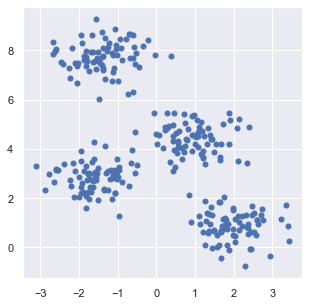

In [2]:
from sklearn.datasets import make_blobs

# Try with random_state=0 or 5
plt.figure(figsize=(5,5))
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=25);

#### Apply KMeans

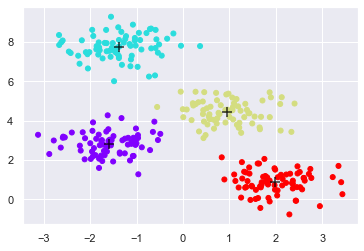

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=25, cmap='rainbow')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.8, marker='+');


## The expectation Maximization algorithm

The expecation maximization algorithms is an iterative method for optimisation of the objective function. It consists of alternating expectation and maximization steps. 

The following code shows how the expectation and maximization steps iterate in finding optimal k-Means solution. In k-Means, the expectation is simply the evaluation of the objective function, to sum of distances from samples to the nearest cluster centers. The maximization step is made by moving the cluster center to better position to the center point of the current cluster content. The algorithms is initialized by given a number of cluster centers or at least number of clusters. Often the initial positions of cluster centers will be initialized randomly. The high densities of samples starts attracting the cluster centers, and at the same time, the competition of samples repels cluster centers farther away from each other. The algorithm may converge to different solutions if initialized differently.

In [4]:
# This code is from Python Data Science Handbook
# https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Expectation-Maximization

from sklearn.metrics import pairwise_distances_argmin
def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(4), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax



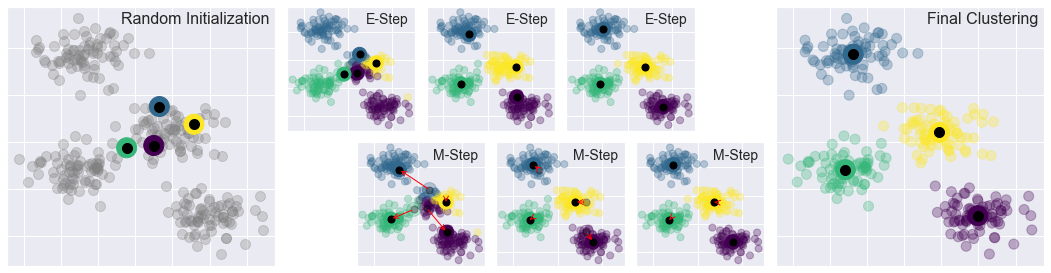

In [5]:
𝑓X, y_true = make_blobs(n_samples=300, centers=4,
                   cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)

fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
     ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1, color='red'))
    
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)


# Final E-step    
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16);


### Application to digits recognition

The digits recognition may be too high dimensional for direct k-Means clustering. Therefore preprocessing with PCA or t-SNE could be good ideas. Let's try all three options to find out
1. Apply k-Means to raw 64 dimensional data
1. Apply linear PCA preprocessing, reduce to 2-dimensions and apply k-Means
1. Apply non-linear t-SNE preprocessing, reduce to 2-dimensions and apply k-Means

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


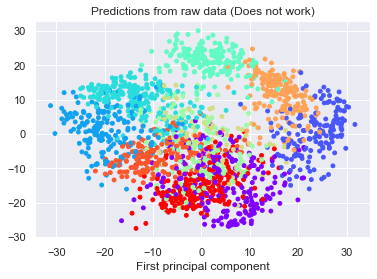

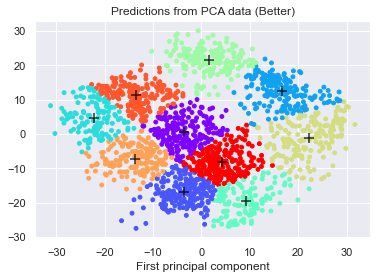

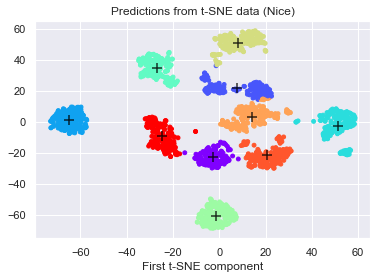

In [6]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load the data and instantiate the k-mean clustering for three cases 
digits = load_digits()
kmeans_raw = KMeans(n_clusters=10)
kmeans_pca = KMeans(n_clusters=10)
kmeans_tsne = KMeans(n_clusters=10)

# Instantiate the projection modules
pca = PCA(2)
tsne=TSNE(n_components=2)

# Make projections on the data
projected_pca = pca.fit_transform(digits.data)
projected_tsne=tsne.fit_transform(digits.data)

# Apply kMeans to three case
#  1) Directly to the input data
#  2) PCA projected data
#  3) tSNE projected data
kmeans_raw.fit(digits.data)
y_km_raw = kmeans_raw.predict(digits.data)

kmeans_pca.fit(projected_pca)
y_km_pca = kmeans_pca.predict(projected_pca)

kmeans_tsne.fit(projected_tsne)
y_km_tsne = kmeans_tsne.predict(projected_tsne)


# Plot them all
plt.figure()
projected=projected_pca
y_kmeans = kmeans_raw.predict(digits.data)
centers = kmeans_raw.cluster_centers_
plt.scatter(projected[:, 0], projected[:, 1], c=y_kmeans, s=15, cmap='rainbow')
plt.title('Predictions from raw data (Does not work)')
plt.xlabel('First principal component')

plt.figure()
projected=projected_pca
y_kmeans = kmeans_pca.predict(projected_pca)
centers = kmeans_pca.cluster_centers_
plt.scatter(projected[:, 0], projected[:, 1], c=y_kmeans, s=15, cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.8, marker='+');
plt.title('Predictions from PCA data (Better)')
plt.xlabel('First principal component')

plt.figure()
projected=projected_tsne
y_kmeans = kmeans_tsne.predict(projected_tsne)
centers = kmeans_tsne.cluster_centers_
plt.scatter(projected[:, 0], projected[:, 1], c=y_kmeans, s=15, cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.8, marker='+');
plt.title('Predictions from t-SNE data (Nice)')
plt.xlabel('First t-SNE component');




The cluster centers can be read from the kmeans object

In [7]:
kmeans_tsne.cluster_centers_

array([[ -2.6414576 , -22.65876   ],
       [  7.770095  ,  21.542501  ],
       [-64.69279   ,   0.88018733],
       [ 51.139     ,  -3.0133724 ],
       [-26.832142  ,  34.328938  ],
       [ -1.3581252 , -60.605473  ],
       [  8.008899  ,  50.52936   ],
       [ 14.09285   ,   3.2191489 ],
       [ 20.802961  , -21.694296  ],
       [-24.811676  ,  -9.36181   ]], dtype=float32)

We can compare if the clustering is matching to the true digits by plotting the confusion matrices:

The confusion matrix $C_{i,j}$, can be used for comparing the predicted values with the true values. In confusion matrix, the true classes are in rows and predicted classes in columns. The numbers in the matrix in  column $C_{i,j}$ shows how many values in true class $i$ are predicted in to belong in class $j$. In an ideal case all values are in diagonal, meaning that the predicted classes are true classes for all predicted values. 

In case of clustering, the order of clusters is not necessarily the same than the order of true classes. In this case, the best solution would be that all the values in each row belong to just one unique cluster.

Raw data
[[  0   1   0   0 177   0   0   0   0   0]
 [ 99   0   1   0   0   1  55   2  24   0]
 [  8   0  13   2   1   0   2   0 148   3]
 [  7   0 157   9   0   2   0   0   1   7]
 [  4 164   0   0   0   0   5   0   0   8]
 [  0   2   1  42   0 136   0   1   0   0]
 [  2   0   0   0   1   0   1 177   0   0]
 [  2   0   0   0   0   1   2   0   0 174]
 [103   0   4  48   0   4   6   2   3   4]
 [  2   0   7 138   0   6  20   0   0   7]]
PCA
[[  1   0  12   0   0 160   1   0   4   0]
 [ 29   9   0   0  87   0   4   0   6  47]
 [ 34   7   0   3   0   0   0 115   4  14]
 [ 11  12   0  98   0   0   0  41  21   0]
 [  0   3  24   0   5   0 144   0   0   5]
 [ 46  25   5   1   0   6   2   3  46  48]
 [  0   0 150   0   0   8  21   0   0   2]
 [  1 116   0   0  21   0   1   1   0  39]
 [ 71  24   0   0   4   0   1   4   8  62]
 [ 17   9   1  30   0   0   0   8 105  10]]
t-SNE
[[  0   0 178   0   0   0   0   0   0   0]
 [  0 147   0  27   0   0   0   8   0   0]
 [  0   0   0 167   0   0   0  10

Text(449.73636363636354, 0.5, 'Digit')

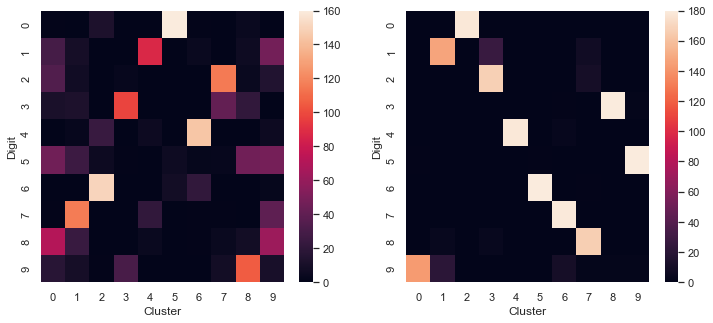

In [8]:
#plt.scatter(digits.target, y_kmeans)
from sklearn.metrics import confusion_matrix
print("Raw data")
print(confusion_matrix(digits.target, kmeans_raw.predict(digits.data)))
print("PCA")
print(confusion_matrix(digits.target, kmeans_pca.predict(projected_pca)))
print("t-SNE")
print(confusion_matrix(digits.target, kmeans_tsne.predict(projected_tsne)))

# Visualize two confusion matrix as heatmaps
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.heatmap(confusion_matrix(digits.target, kmeans_pca.predict(projected_pca)), ax=ax1)
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Digit')
sns.heatmap(confusion_matrix(digits.target, kmeans_tsne.predict(projected_tsne)), ax=ax2)
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Digit')

### k-Means assumptions

Take a look at the graphical representation of [k-Means assumptions](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html).

## Gaussian mixture models

Gaussian mixture model builds, using mixtures of normal distributions, a combined probability distribution which fit to the data is maximized using Epectation Maximization algorithm.

The steps in GMM are very similar than in k-Means.

1. Initialize k normal distributions, using for example random mean and constant standard deviations
1. Repeat until convergence
  1. Expectation step: Calculate the probability of each sample $x_i$ belonging to each cluster $c_j$, and assign samples to those clusters where the probability, or expected membership, is the highest.
  1. Maximization: Calculate the mean values and standard deviations of the members of each cluster and update the means and deviations of each distribution
 

### Lambda functions

Small unnamed functions are sometimes quite convenient in programming. They are often called as [lambda functions](https://en.wikipedia.org/wiki/Anonymous_function), and they can be used in many programming languages. This is how they are defined in Python:

- The function is defined using keyword `lambda`
- After the keyword, list the parameters for the function and end the statement with colon, like `lambda x,y:`
- Then define the body of the function in one line. The value of the statement is the value returned by the function. No return statetement is used.
- Use function directly, or assign it to the variable, which then becomes this function

The following statements creates a function which squares a value
`square = lambda x: x**2`

### Example of EM for GMM in one dimensional case

In [9]:
# Scientific python includes very convenient object form normal distributions
# which supports providing random samples, probability density function (PDF)
# and cumulative distribution function (CDF)
from scipy.stats import norm

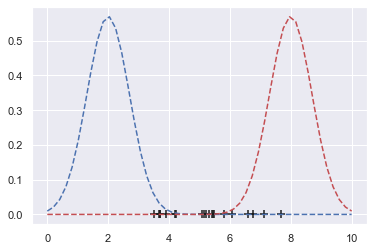

In [10]:
## Generate 20 normal distributed random samples mean=5, std=1
N=10
datax=np.concatenate([norm.rvs(loc=4, scale=1, size=N), norm.rvs(loc=6, scale=1, size=N)])
datay=np.zeros(2*N)
plt.scatter(datax, datay, s=50, c='k', marker='+')

## Define two normal distributions, means (2,8) stds=(0.7,0.7)
x=np.linspace(0,10)
g1 = lambda x: norm.pdf(x, loc=2, scale=0.7)
g2 = lambda x: norm.pdf(x, loc=8, scale=0.7)
plt.plot(x,g1(x),'b--',x,g2(x),'r--')

# Find the probabilities that the samples belong to cluster 1 or 2
p1=g1(datax)
p2=g2(datax)

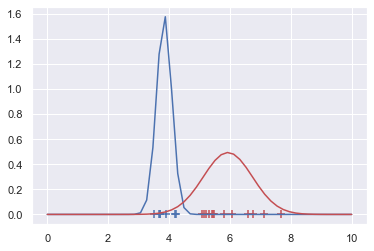

In [11]:

### EXPECTATION: Assign to the clusters so that expectation is maximized
c1 = datax[p1>=p2]
c2 = datax[p1<p2]

# Plot the membership
plt.scatter(c1, np.zeros(len(c1)), s=80, c='b', marker='+', alpha=1)
plt.scatter(c2, np.zeros(len(c2)), s=80, c='r', marker='+', alpha=1)

### MAXIMIZATION: Update the distributions
g1 = lambda x: norm.pdf(x, loc=c1.mean(), scale=c1.std())
g2 = lambda x: norm.pdf(x, loc=c2.mean(), scale=c2.std())
plt.plot(x,g1(x), 'b-',x,g2(x), 'r-')

# Then repeat the expectation and maximization steps, until converged

- EM algorithm for GMM works similar way in multidmensional case.
- It supports different deviation for each groups
- In multidimensional case, the std or variance can be calculated it three different ways
  - One dimensional variance: assume isotropic cluster distribution (circular/spherical distributions)
  - Calculate along coordinate axis: elliptical / ellipsoid distirbutions, whose axis are aligned with coordinate axis
  - Calculate full covariance: elliptical / ellipsoidal distributions in any angle
- Full covariance needs more parameters and therefore more training data, whereas one dimensional variance can be calculated with little training samples

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[[  0   0 178   0   0   0   0   0   0   0]
 [  0  99   0   0   0   0   0  27   0  56]
 [  0  10   0   0   0   0   0 167   0   0]
 [  0  13   0   0   2   1 167   0   0   0]
 [178   3   0   0   0   0   0   0   0   0]
 [  0   0   0   1 179   0   0   0   2   0]
 [  0   0   0 181   0   0   0   0   0   0]
 [  0   0   0   0   0 179   0   0   0   0]
 [  0 173   0   0   0   0   0   0   0   1]
 [  0   4   0   0   2  10   2   0 142  20]]


/var/folders/v0/s3zr2ztd3ks4prxb7dbcng4w0000gn/T/ipykernel_26230/714296705.py:29: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


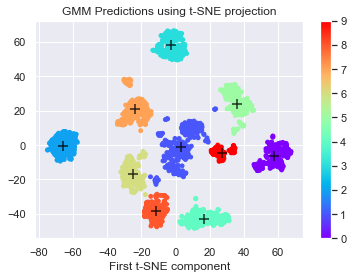

In [12]:
from sklearn.datasets import load_digits
from sklearn.mixture import GaussianMixture


digits = load_digits()

# Instantiate the projection modules
pca = PCA(2)
tsne=TSNE(n_components=2)

# Make projections on the data
useTSNE=True
if useTSNE:
    method='t-SNE'
    projected=tsne.fit_transform(digits.data)
else:
    method='PCA'
    projected = pca.fit_transform(digits.data)
    
# Fit the model
gmm = GaussianMixture(n_components=10,covariance_type='full').fit(projected)

# Predict clusters
labels = gmm.predict(projected)
centers = gmm.means_

# Plot the data
plt.scatter(projected[:, 0], projected[:, 1], c=labels, s=15, cmap='rainbow')
plt.colorbar()
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.8, marker='+');
plt.title('GMM Predictions using %s projection' % (method))
plt.xlabel('First t-SNE component')


print(confusion_matrix(digits.target, gmm.predict(projected)))

#plt.figure()
#sns.heatmap(confusion_matrix(digits.target, gmm.predict(projected)))

GMM is probabilistic model supporting also prediction probabilities. In other words, it can tell what is the probability of a certain sample in belonging to a certain cluster. For example let's calculated all probabilities and then visualize the probabilities of sample 19 in belonging to certain clusters.

Due to stochastic nature of t-SNE and GMM, the results may vary in each run of GMM or t-SNE.

<BarContainer object of 10 artists>

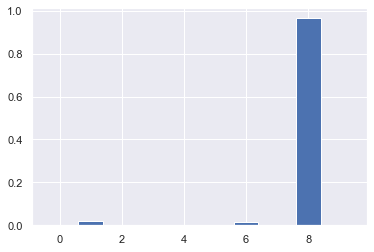

In [13]:
i=19
plt.bar(range(10), gmm.predict_proba(projected)[i])

### Sampling data

The Gaussian Mixture Model is actually a probabilistic density model of the data. It can be therefore used for sampling new data samples from the domain of the original data. Those samples are distributed in the same way than the original data, and the samples are drawn from each cluster.

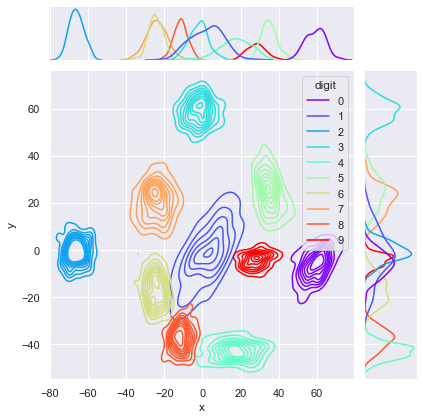

In [14]:
import pandas as pd

# Sample 1000 samples
data,digit=gmm.sample(1000)
r=pd.DataFrame(data=data,columns=['x', 'y'])
r['digit']=digit

#sns.displot(
sns.jointplot(
    data=r,
    x="x", y="y", 
    hue = "digit",
    kind="kde",
    palette='rainbow'
)
#plt.axis([-40, 40, -40, 40])

### Trial for sampling random characters

Having trained the GMM model, we could draw random characters from the distribution of original data, and transform them back to 64-dimensional feature space. This can be only done when using PCA, since there is no inverse transform for manifold methods.

Lets first recall the code which was able to print the characters, and define a function of it.

In [15]:
def printCharacters(characters):
    # First create a array of 10 subplots in one row
    fig,axn=plt.subplots(nrows=1, ncols=10, figsize=(10,2))

    # Select one example of each character and plot them in separate subplot
    for i in range(10):
        # Select one subplot. axn can contain a two-dimensional array
        # of subplots. flatten() shrinks the structure 
        ax=axn.flatten()[i]

        # Plot the data as an 8x8 array, using grey colormap
        ax.imshow(characters[i,:].reshape((8,8)), cmap='Greys')

        # Disable the numbers in x- and y-axes by setting them as empty lists
        ax.set_xticks([])
        ax.set_yticks([])

Then code below does the following
1. Prints the original digits 
1. converts the digits into 4-dimensional subspace with PCA
1. Converts the digits back to feature space and prints them
1. Trains the GMM model in 4-dimensional subspace
1. Draws random samples in this subspace and convert them back to feature space and print

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 0 0 1 5 6 6 7 8 9]


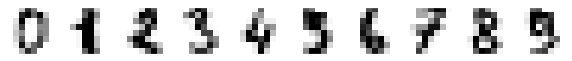

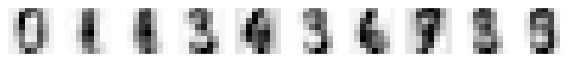

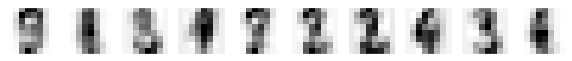

In [16]:
# Print original characters
printCharacters(digits.data[:10])
print(digits.target[:10])


pca = PCA(4)
projected = pca.fit_transform(digits.data)

# Convert originals back to 64 dim feature space and print
printCharacters(pca.inverse_transform(projected[:10]))
print(digits.target[:10])

# Fit the GMM model and sample random characters 
gmm = GaussianMixture(n_components=10,covariance_type='full').fit(projected)
data,character=gmm.sample(10)

# Convert randomly generated samples back to 64 dim feature space
printCharacters(pca.inverse_transform(data))
print(character)

### The results of PCA forward and inverse transformation and GMM random sampling

- Even four dimensional PCA didn't yet capture very well the details of the the caracters. This was already known based on our experimentation with PCA in the last lecture.
- The 4-component PCA - inverse PCA transformation lost some relevant information and the characters are not perfectly reconstructed
- The GMM model sampled data from the distribution it learned from the original characters, in PCA space, and when those sampled characters were converted back to feature space, they look like numbers indeed.
- The GMM model coudn't perfectly cluster the numbers, since the 4 dimensional PCA didn't contain enough information for that purpose
- Higher dimensionality in PCA space does not help, because then the linear GMM model does not work very well any longer due to so called curse of dimensionality
- Non-linear manifold methods produced better transformation in low-dimensional space, but they do not have inverse transformations.

## Other clustering methods

There are plenty of other clustering methods with different properties. Some of them can handle non-linear cluster better than others, some are fast and some slow. Some can be parallelized and some can handle very large amounts of data. The understanding of operation and limitations of these basic clustering methods shown above, you should be able to compare other methods listed [clustering topic of scikit learn](https://scikit-learn.org/stable/modules/clustering.html), and choose the most suitable. Because all of those available in scikit.learn implement the same object oriented API, it is easy to try many of them in your practical case.

Some questions you can ask when selecting a clustering algorithm
- Does it need to handle non-linear clusters?
- What parameters does it need?
- Does it need to find the number of clusters automatically?
- How important is the speed?
- Can it handle large data sets?
- What distance metrics it uses?
- Can it handle high dimensional data?
- Does it need to predict probabilities?

## Conclusion

k-Means algorithm
- Simple linear clustering algorithm based on expectation maximization algorithm
- The number of clusters needs to be given
- Expects that the data is distributed isotropically, i.e. clusters are circular, not ellipses
- Assumes that the variance in each cluster is equal
- Works best when the size of the clusters are equal

Gaussian Mixture model 
- Simple linear clustering algorithm based on expectation maximization algorithm
- Models the distribution of the data with mixture of Gaussian distributions
- The number of clusters needs to be given
- Can model non-isotoropically distributed data (covariance_type='full')
- Can model different variance for different clusters
- Probabilistic model, meaning that it can also predict the probability that the sample belogs to the certain cluster
- Can be used for sampling new data based on the same distribution as existing data

There are plenty of other clustering algorithms, which are well documented and easy to take into use.